In [1]:
include("../../../julia/FNC_init.jl")

  Activating 

project at `~/Documents/GitHub/fnc`


[**Demo %s**](#demo-matrixfree-deblur)

We repeat the earlier process to blur an original image $\mathbf{X}$ to get $\mathbf{Z}$.

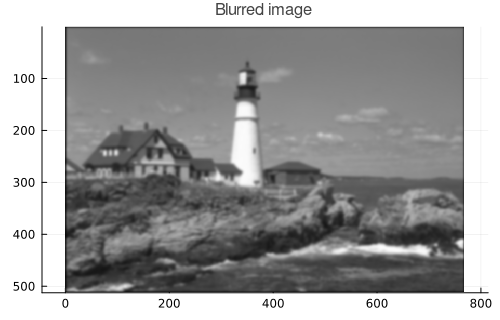

In [2]:
using TestImages, Images, SparseArrays
img = testimage("lighthouse")
m, n = size(img)
X = @. Float64(Gray(img))

B = spdiagm(0 => fill(0.5, m),
    1 => fill(0.25, m - 1), -1 => fill(0.25, m - 1))
C = spdiagm(0 => fill(0.5, n),
    1 => fill(0.25, n - 1), -1 => fill(0.25, n - 1))
blur = X -> B^12 * X * C^12
Z = blur(X)
plot(Gray.(Z), title="Blurred image")

Now we imagine that $\mathbf{X}$ is unknown and that we want to recover it from $\mathbf{Z}$. We first need functions that translate between vector and matrix representations.

In [3]:
# vec (built-in) converts matrix to vector
unvec = z -> reshape(z, m, n);  # convert vector to matrix

```{index} ! Julia; LinearMap
```

Now we declare the three-step blur transformation as a `LinearMap`, supplying also the size of the vector form of an image.

In [4]:
using LinearMaps
T = LinearMap(x -> vec(blur(unvec(x))), m * n);

The blurring operators are symmetric, so we apply `minres` to the composite blurring transformation `T`.
```{tip}
:class: dropdown
The function `clamp01` in `Images` restricts values to be in the interval $[0,1]$.
```

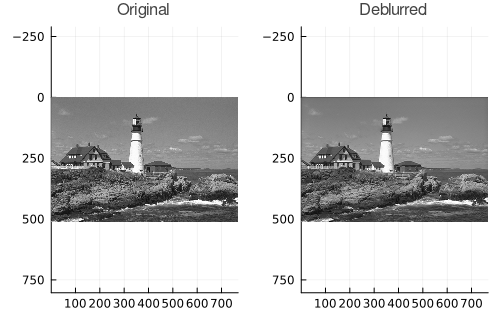

In [5]:
using IterativeSolvers
y = minres(T, vec(Z), maxiter=50, reltol=1e-5);
Y = unvec(clamp01.(y))

plot(Gray.(X), layout=2, title="Original")
plot!(Gray.(Y), subplot=2, title="Deblurred")